In [2]:
import sys
sys.path.append("../")

from __init__ import *
from data_tools import *
from testing import *

In [14]:
NEW_frame = pd.read_pickle("../data/simulations_truth/He0HAtomicScatters.pkl")

NEW_frame.head()

time = NEW_frame['Time [seconds]']

len(time)

final_times = []
for i in range(len(time)):
    final_times.append(time[i][-1])

(array([ 5.,  8.,  4.,  4.,  4.,  5.,  7.,  6.,  2.,  5., 10.,  2.,  3.,
         8.,  2.,  5.,  2.,  2.,  4.,  2.,  4.,  5.,  4.,  4.,  4.,  0.,
         4.,  4.,  1.,  1.,  3.,  2.,  3.,  6.,  1.,  2.,  3.,  2.,  8.,
         3.,  4.,  3.,  2.,  4.,  5.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,
         2.,  2.,  1.,  2.,  2.,  0.,  1.,  1.,  3.,  2.,  0.,  1.,  1.,
         1.,  0.,  1.,  0.,  4.,  1.,  2.,  1.,  2.,  1.,  2.,  1.,  0.,
         1.,  3.,  0.,  1.,  0.,  2.,  1.,  3.,  2.,  1.,  1.,  0.,  1.,
         3.,  0.,  3.,  1.,  2.,  1.,  2.,  4.,  4.]),
 array([1.09151933e-06, 1.10170966e-05, 2.09426738e-05, 3.08682510e-05,
        4.07938282e-05, 5.07194054e-05, 6.06449826e-05, 7.05705599e-05,
        8.04961371e-05, 9.04217143e-05, 1.00347292e-04, 1.10272869e-04,
        1.20198446e-04, 1.30124023e-04, 1.40049600e-04, 1.49975178e-04,
        1.59900755e-04, 1.69826332e-04, 1.79751909e-04, 1.89677486e-04,
        1.99603064e-04, 2.09528641e-04, 2.19454218e-04, 2.29379795e-04,
  

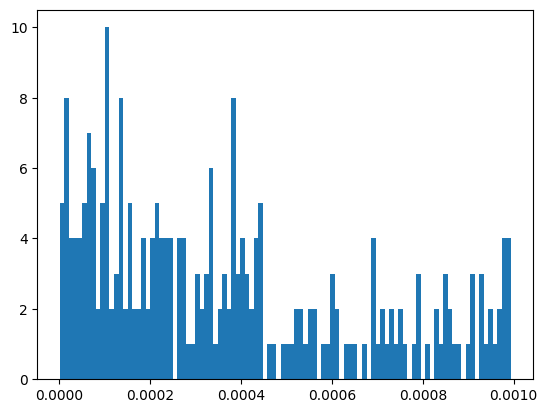

In [16]:
plt.hist(final_times, bins=100)

In [17]:
path_to_dir = '/Users/nathan/Desktop/HeFractionScatters/fixed atomic/' # Path to data
file_list = glob.glob(path_to_dir + '*.h5', recursive=True) # List of Files
file_sim_list = [] # New List of Files

path_prefix = '../../../../' # Path Prefix

for f in file_list: # Iterate through list of Files

    suffix = f.split('nathan/')[-1] # Get the suffix of the file
    true_path = path_prefix + suffix # Get the true path of the file
    file_sim_list.append(true_path) # Append the true path to the new list




data_container = []

(363216,)
(560480,)
(15161,)


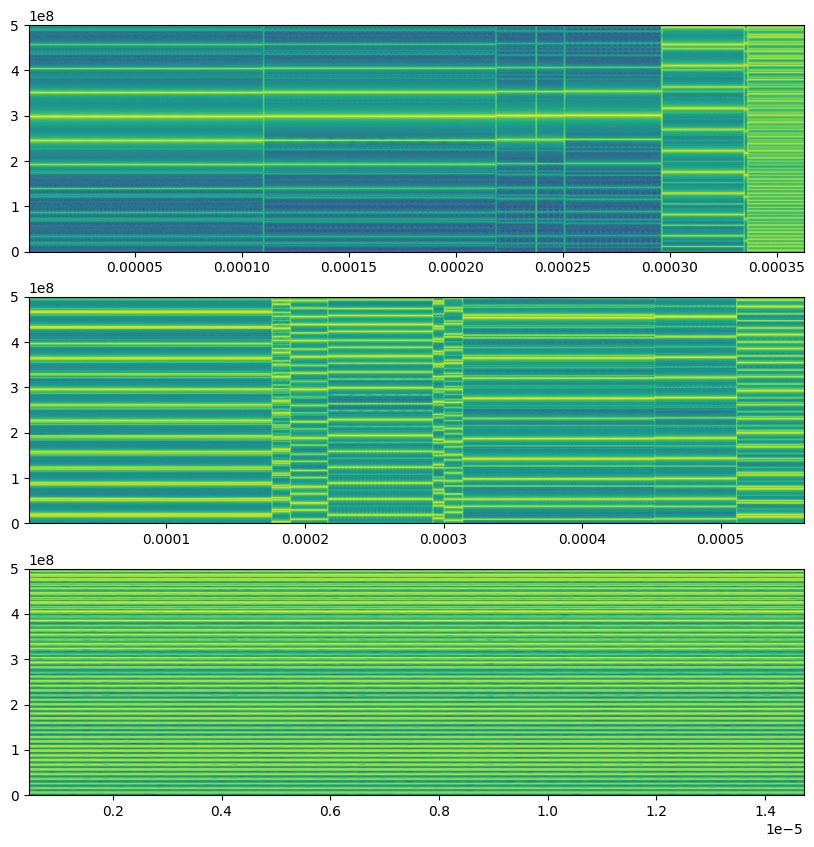

/Users/nathan/miniforge3/lib/python3.10/site-packages/matplotlib/axes/_axes.py:7944: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


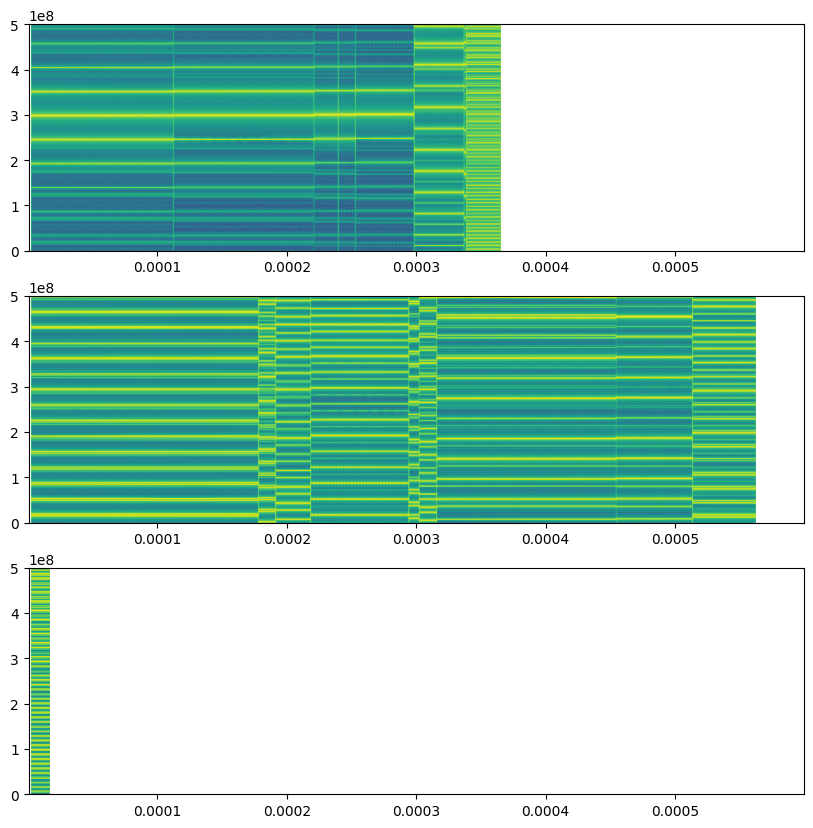

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))


for i in range(0, 3):
    file_name = file_sim_list[i]

    signal_strings, keys, data = get_attributes(file_name, full_path=True)
    signal = get_signal(file_name, signal_string=signal_strings[0])

    if i == 0:
        ax1.specgram(signal, NFFT=1024, Fs=1e9, noverlap=900);
        print(signal.shape)
    
    if i == 1:
        file_name = file_sim_list[i+50]

        signal_strings, keys, data = get_attributes(file_name, full_path=True)
        signal = get_signal(file_name, signal_string=signal_strings[0])
        print(signal.shape) 
        ax2.specgram(signal, NFFT=1024, Fs=1e9, noverlap=900);
        
    if i == 2:
        
        file_name = file_sim_list[i+20]

        signal_strings, keys, data = get_attributes(file_name, full_path=True)
        signal = get_signal(file_name, signal_string=signal_strings[0])
        
        print(signal.shape)
        
        ax3.specgram(signal, NFFT=1024, Fs=1e9, noverlap=900);


plt.show()

# Pad the data so that it produced
# Create an array that is 400,000 samples long of zeros
# Then recast the signal arrays into the new array at a fixed position around 2,000 samples in

new_arr = np.zeros(600000)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

for i in range(0, 3):
    
    file_name = file_sim_list[i]

    signal_strings, keys, data = get_attributes(file_name, full_path=True)
    signal = get_signal(file_name, signal_string=signal_strings[0])
    
    if i == 0:
        new_arr[2000:signal.shape[0]+2000] = signal
        
        ax1.specgram(new_arr, NFFT=1024, Fs=1e9, noverlap=900);
        
    if i == 1:
        new_arr = np.zeros(600000)

        file_name = file_sim_list[i+50]

        signal_strings, keys, data = get_attributes(file_name, full_path=True)
        signal = get_signal(file_name, signal_string=signal_strings[0])
        
        new_arr[2000:signal.shape[0]+2000] = signal
        
        ax2.specgram(new_arr, NFFT=1024, Fs=1e9, noverlap=900);
        
    if i == 2:
        new_arr = np.zeros(600000)

        
        file_name = file_sim_list[i+20]

        signal_strings, keys, data = get_attributes(file_name, full_path=True)
        signal = get_signal(file_name, signal_string=signal_strings[0])
        
        new_arr[2000:signal.shape[0]+2000] = signal
        
        vals = ax3.specgram(new_arr, NFFT=1024, Fs=1e9, noverlap=900);
plt.show()

In [45]:
for i in range(len(vals)):
    print(vals[i].shape)
    

(513, 4831)
(513,)
(4831,)


AttributeError: 'AxesImage' object has no attribute 'shape'

In [ ]:
for i, f in enumerate(file_sim_list):
     
        
        signal_strings, keys, data = get_attributes(f, full_path=True)
        filename = f.split('/')[-1]
        trap_type = f.split('/')[-3]
        
        
        keys.insert(0, 'File_name')
        
        if i == 0: # Initialise dictionary
        
            data_dict = {key: [] for key in keys}
        
        for j, key in enumerate(keys):
            if j == 0:
                value = filename
            else:
                value = data[0][j-1]
            
            # if isinstance(value, np.ndarray):
            #     value = list(value)
    
                
            data_dict[key].append(value)
            
        if i % 100 == 0:
            print(f'{i} files processed')